### Project Overview:


In [93]:
import os
import re
from matplotlib import pyplot as plt
from lexicalrichness import LexicalRichness
import pandas as pd
import numpy as np

In [94]:
def load_book(filename: str) -> str:
    '''
    Takes a filename of a txt file from project gutenberg and strips the text from the file.
    '''
    lines = [l.rstrip() for l in open(filename, 'r', encoding='utf8')]
    
    exp = re.compile(r'^\*\*\* (START|END).*PROJECT GUTENBERG.*\*\*\*$')
    start, end = [lines.index(l) for l in lines if exp.match(l)]
    lines = lines[start+1:end]
    text =  ' '.join(lines)
    return text

### Collect The Book Paths and Create a Dictionary

In [95]:
books_dir = 'books'
engl_books = os.listdir(books_dir + '/English')
germ_books = os.listdir(books_dir + '/German')

book_paths = {'English':[], 'German':[]}
print('The following books have been collected: ')
print('\t{:>3s} {:<30s}'.format('#', 'title'))
for i, book in enumerate(set(engl_books) | set(germ_books)):
    title = book.rstrip('.txt')
    if len(title) > 22: title = title[:23] + '...'
    in_engl, in_germ = book in engl_books, book in germ_books
    print('\t{:>3d} {:<30s} {:<10b} {:<10b}'.format(i+1, title, in_engl, in_germ))
    if in_engl:
        book_paths['English'].append((title, books_dir + '/English/' + book))
    if in_germ:
        book_paths['German'].append((title, books_dir + '/German/' + book))

The following books have been collected: 
	  # title                         
	  1 Macbeth Shakespeare            1          1         
	  2 Alices Adventures in Wo...     1          1         
	  3 Uncle Toms Cabin Harrie...     1          1         
	  4 Treasure Island Robert ...     1          1         
	  5 A Christmas Carol Charl...     1          1         
	  6 Romeo and Juliet Shakes...     1          1         
	  7 Peter Pan James Barrie         1          1         
	  8 Oliver Twist Charles Di...     1          1         


In [96]:
col_names = ['title', 'language', 'words', 'terms', 'moving avg', 'maas diversity']
df = pd.DataFrame(columns=col_names)
for k in book_paths.keys():
    for title, path in book_paths[k]:
        text = load_book(path)
        lex = LexicalRichness(text)
        df.loc[len(df.index)] = [title, k, lex.words, lex.terms, lex.mattr(), lex.Maas]

### making some cool plots

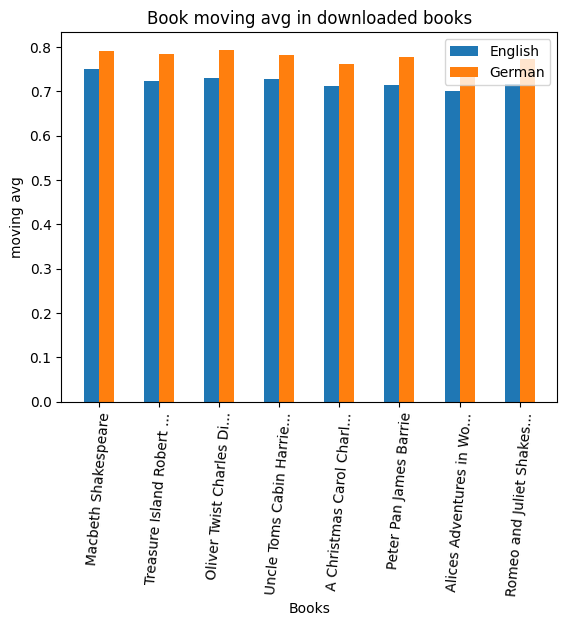

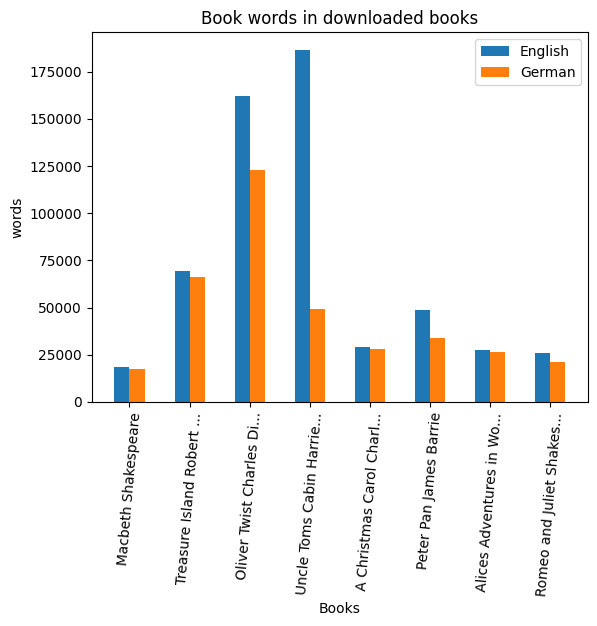

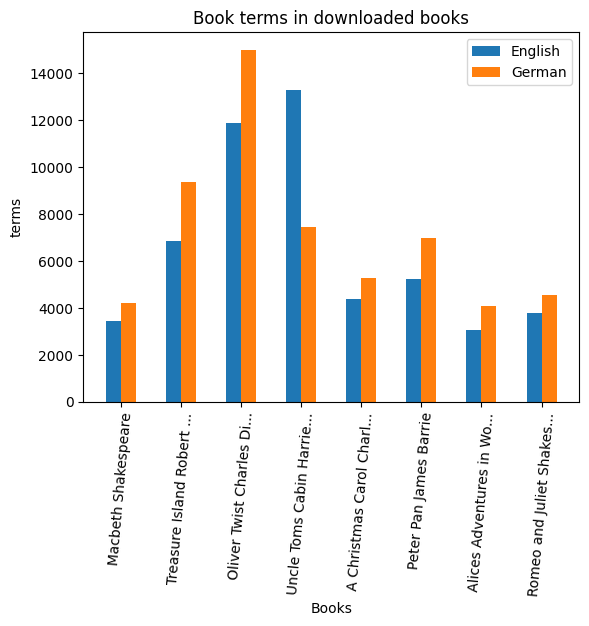

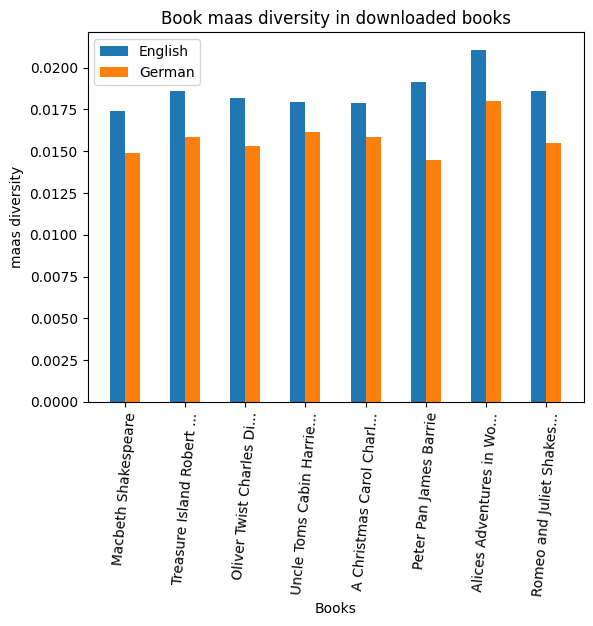

In [97]:
def plot_category(category):
    avg_dict = {'English':[], 'German':[]}
    for title in set(df['title']):
        data = df[df['title'] == title]
        for lang in avg_dict.keys():
            if lang in data['language'].values:
                avg_dict[lang].append(data[data['language'] == lang][category].values[0])
            else:
                avg_dict[lang].append(0)

    fig, ax = plt.subplots()
    X_axis = np.arange(len(set(df['title'])))
    width = 0.25

    ax.bar(X_axis - width/2, avg_dict['English'], width, label='English')
    ax.bar(X_axis + width/2, avg_dict['German'], width, label='German')
    plt.title(f'Book {category} in downloaded books')
    plt.ylabel(category)
    plt.xlabel('Books')
    plt.xticks(X_axis, set(df['title']), rotation=85)
    plt.legend()
    plt.show()

plot_category('moving avg')
plot_category('words')
plot_category('terms')
plot_category('maas diversity')